In [48]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.finance import candlestick_ochl

In [38]:
data = pd.read_csv("./data/stock_day/stock_day.csv")

In [39]:
data = data.sort_index()[:200]

In [40]:
# 1、计算指标值
# MACD返回的参数 第一个是快线的数据，第二个是慢线的数据，第三个就是MACD值
dif, dea, mac_d = talib.MACD(data.close.values, fastperiod=12, slowperiod=26, signalperiod=9)
print(mac_d)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan  0.63092461  0.42360774  0.28319644
  0.17037557  0.07271566 -0.0296332  -0.0190836  -0.10356872 -0.14659018
 -0.1572046  -0.18743549 -0.31027444 -0.46614278 -0.59582757 -0.58288203
 -0.51881747 -0.42169749 -0.37563579 -0.2489013  -0.15553655 -0.04614566
  0.0331993   0.22221771  0.48487844  0.69905041  0.81002143  0.80780132
  0.64803293  0.3191953   0.11341185  0.04953042  0.05740466 -0.01026687
 -0.09619111 -0.08608581  0.04322582  0.29845051  0.45771502  0.54935595
  0.6104246   0.37076989  0.22110346  0.0279681  -0.12555429 -0.43736698
 -0.68746063 -0.77315007 -0.87334624 -1.01368258 -1

/Users/huxinghui/virtualenv/aiquant/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/Users/huxinghui/virtualenv/aiquant/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


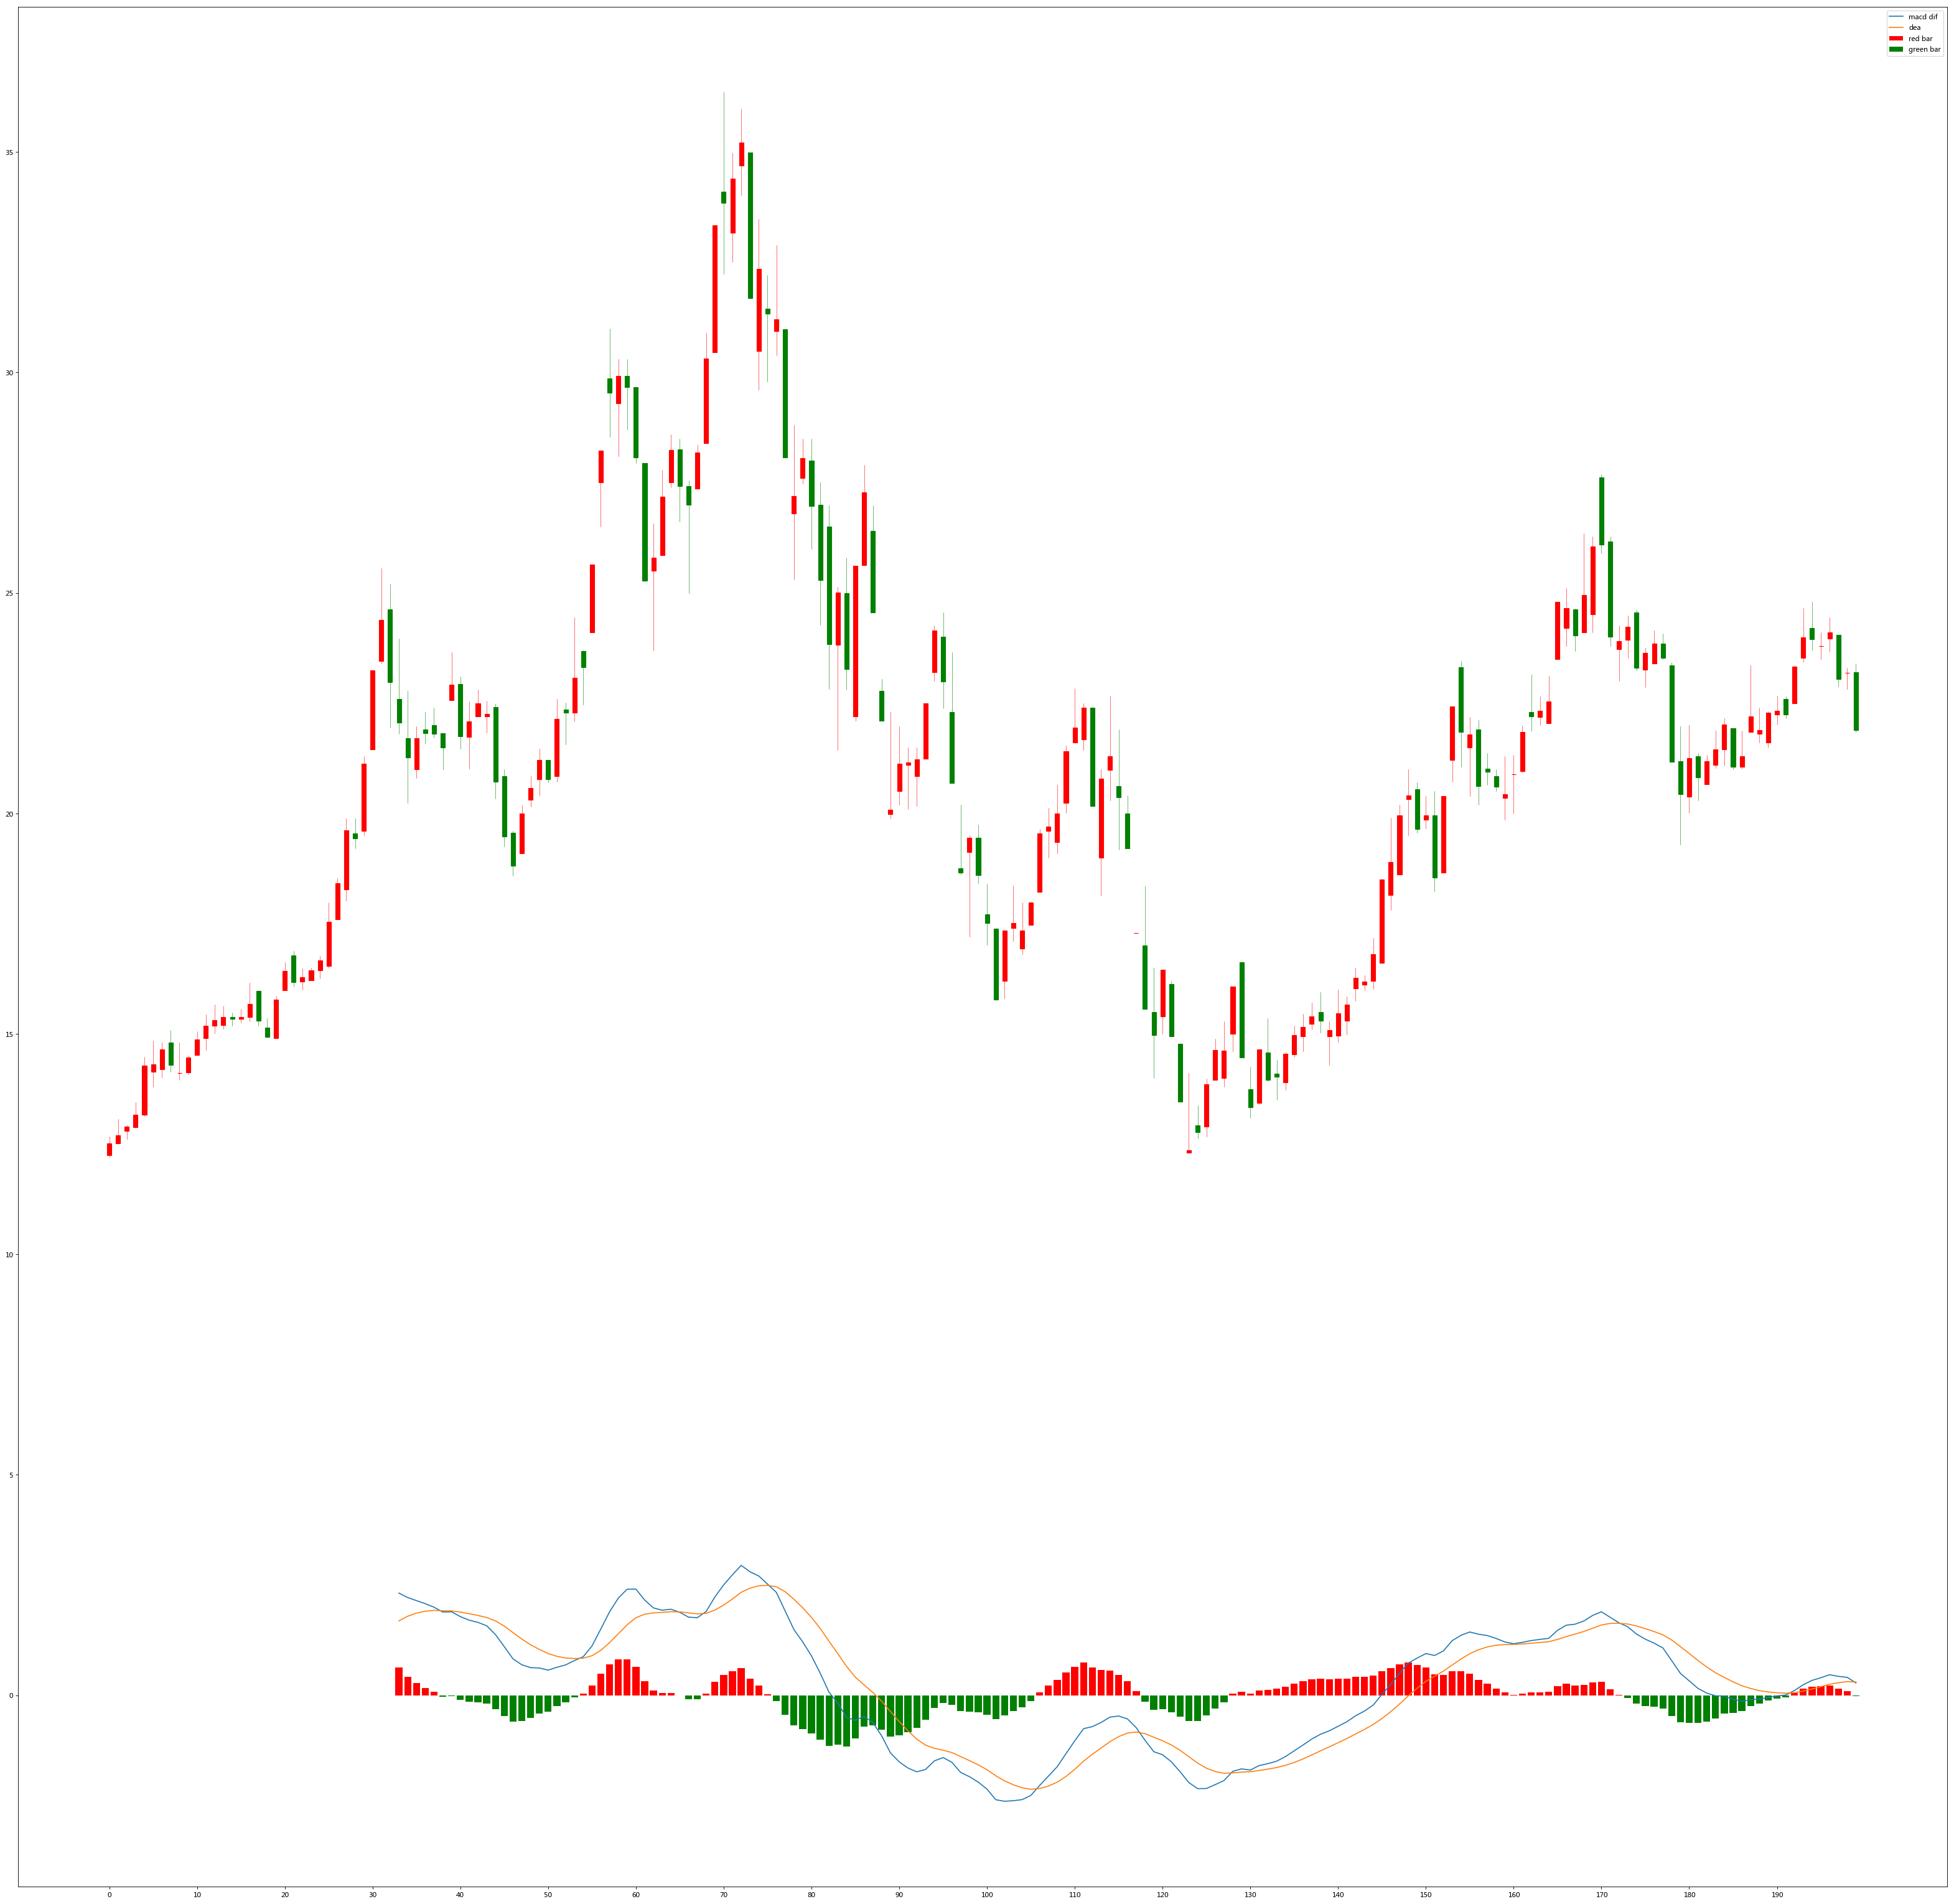

In [52]:
# 先进行画图，首先展示这两条线
# 创建画板
fig, axes = plt.subplots(figsize=(50,50), dpi=80)

# 准备数据, x值和y值
plt.plot(data.index, dif, label="macd dif")
plt.plot(data.index, dea, label="dea")

# 画出MACD柱状图值
# 1、画红色柱状图
red_macd = np.where(mac_d > 0, mac_d, 0)
green_macd = np.where(mac_d < 0, mac_d, 0)

# 2、画绿色的柱状图
plt.bar(data.index, red_macd, color='r', label="red bar")
plt.bar(data.index, green_macd, color='g',label="green bar")

data.index = [i  for i in range(200)]
data = data[['open', 'close', 'high', 'low']].reset_index()

# 显示K线图的结果
candlestick_ochl(axes, data.values, colordown='g', colorup='r', width=0.5)

# 标注线
plt.legend(loc="best")

# 对行的刻度进行修改
plt.xticks(data.index[::10])

plt.show()

In [55]:
# 生成ATR指标数据，分析当前股票的波动率
atr_14 = talib.ATR(data.high.values, data.low.values, data.close.values, timeperiod=14)
atr_21 = talib.ATR(data.high.values, data.low.values, data.close.values, timeperiod=21)
close = data.close.values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b5a65f8>,
      dtype=object)

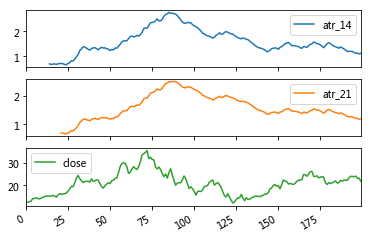

In [58]:
# 画图比较
pd.DataFrame({'close': close, 'atr_14': atr_14, 'atr_21':atr_21}).plot(subplots=True)